In [1]:
import torch
from transformers import BertTokenizer, BertModel#, BertForMaskedLM
import numpy as np

In [2]:
# tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# model
model = BertModel.from_pretrained('bert-base-uncased')

input_string = "The bank robber stopped by the bank. The bank happened to be along the sea bank"
encoded_string = tokenizer.encode(input_string)
encoded_vector = torch.tensor(encoded_string)

#input_ids = torch.tensor(tokenizer.encode("Hello, my dog is cute")).unsqueeze(0)  # Batch size 1
input_ids = encoded_vector.unsqueeze(0) # arraysize 1 for 1 string

# run model on input
outputs = model(input_ids)
last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple

In [3]:
len(tokenizer.vocab)

30522

In [4]:
print(f'input_string: {input_string}')
print()
print(f'{np.shape(encoded_string)} encoded_string: {encoded_string}')
print()
print(f'{encoded_vector.size()} encoded_vector: {encoded_vector}')
print()
print(f'{input_ids.size()} input_ids: {input_ids}')
print()
#print(f'({outputs[0].size()}, {outputs[1].size()})outputs: {outputs}')
print()

print('Tokens:')
tokens = tokenizer.convert_ids_to_tokens(input_ids.squeeze())
print(tokens)

print('Embeddings:')
embeddings = outputs[0].squeeze()
print(embeddings)

#print('Tokens -> Embeddings Pair')
#for word, vec in zip(tokens, embeddings):
#    print(word, vec.detach().numpy()[:5])


# locate occurances of bank
indices = [i for i, token in enumerate(tokens) if token == "bank"]
print(f'index locations of "bank": {indices}')

input_string: The bank robber stopped by the bank. The bank happened to be along the sea bank

(19,) encoded_string: [101, 1996, 2924, 27307, 3030, 2011, 1996, 2924, 1012, 1996, 2924, 3047, 2000, 2022, 2247, 1996, 2712, 2924, 102]

torch.Size([19]) encoded_vector: tensor([  101,  1996,  2924, 27307,  3030,  2011,  1996,  2924,  1012,  1996,
         2924,  3047,  2000,  2022,  2247,  1996,  2712,  2924,   102])

torch.Size([1, 19]) input_ids: tensor([[  101,  1996,  2924, 27307,  3030,  2011,  1996,  2924,  1012,  1996,
          2924,  3047,  2000,  2022,  2247,  1996,  2712,  2924,   102]])


Tokens:
['[CLS]', 'the', 'bank', 'robber', 'stopped', 'by', 'the', 'bank', '.', 'the', 'bank', 'happened', 'to', 'be', 'along', 'the', 'sea', 'bank', '[SEP]']
Embeddings:
tensor([[-0.3348, -0.5901, -0.0709,  ..., -0.4969, -0.0981,  0.5151],
        [ 0.0384, -0.8923, -0.4894,  ..., -0.0810,  1.4962, -0.2147],
        [ 0.9223, -0.5738,  0.2019,  ..., -0.3166,  0.0873, -0.1818],
        ...,
    

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd

In [6]:
# vector embeddings of each token
vec_embeddings = embeddings.detach().numpy()

# color for each token for visuals
token_color = [np.random.rand(3,) for _ in range(len(tokens))]

In [17]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vec_embeddings)
print(np.shape(pca_result))

(19, 2)


In [18]:
df = pd.DataFrame(pca_result, columns=['pca_0', 'pca_1'], index=tokens)
display(df)

,pca_0,pca_1
[CLS],-0.756353,3.959736
the,-0.886341,-3.223484
bank,-4.370692,4.563926
robber,-2.621582,0.407227
stopped,-0.701320,-3.836591
by,-1.159848,-3.610342
the,-1.387287,-5.158026
bank,-4.821440,7.203255
.,13.171331,2.298308
the,-1.399593,-6.113348


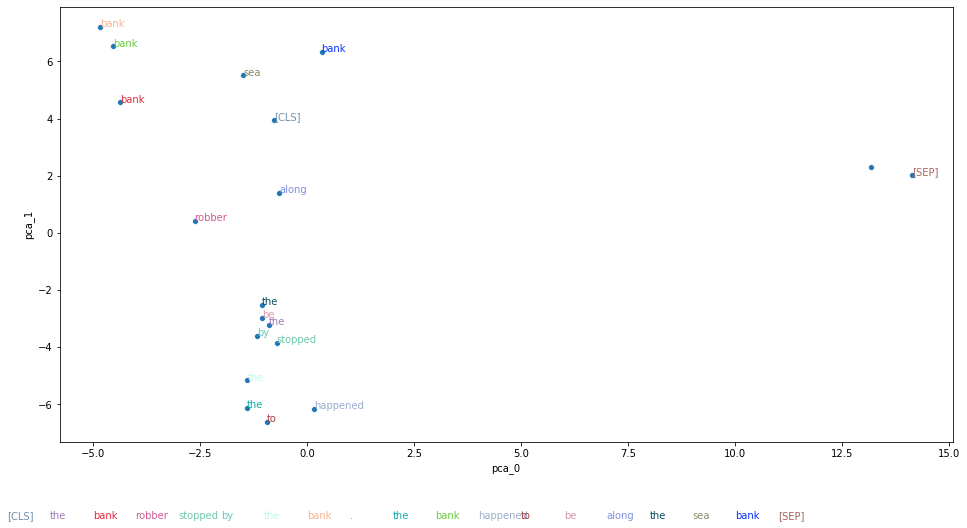

In [35]:
plt.figure(figsize=(16,8))
sns.scatterplot(
    x='pca_0', y='pca_1',
    data=df,
    legend='full'
)
plt.grid()

ax = plt.gca()
for (k, v), color in zip(df.iterrows(), token_color):
    ax.annotate(k, v, c=color)

for idx, (token, color) in enumerate(zip(tokens, token_color)):
    plt.text(-7 + idx*1, -10, token, fontsize='medium', color=color)

In [36]:
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(vec_embeddings)
print(np.shape(tsne_results))

(19, 2)


In [37]:
df = pd.DataFrame(tsne_results, columns=['tsne_0', 'tsne_1'], index=tokens)
display(df)

,tsne_0,tsne_1
[CLS],199.678940,61.658314
the,-430.432190,45.061382
bank,91.372826,-58.219788
robber,-21.180012,-292.097412
stopped,105.225029,-170.360413
by,-68.107330,-100.020874
the,19.358192,-113.914780
bank,94.261475,102.464714
.,142.263077,4.128197
the,22.080217,190.453293


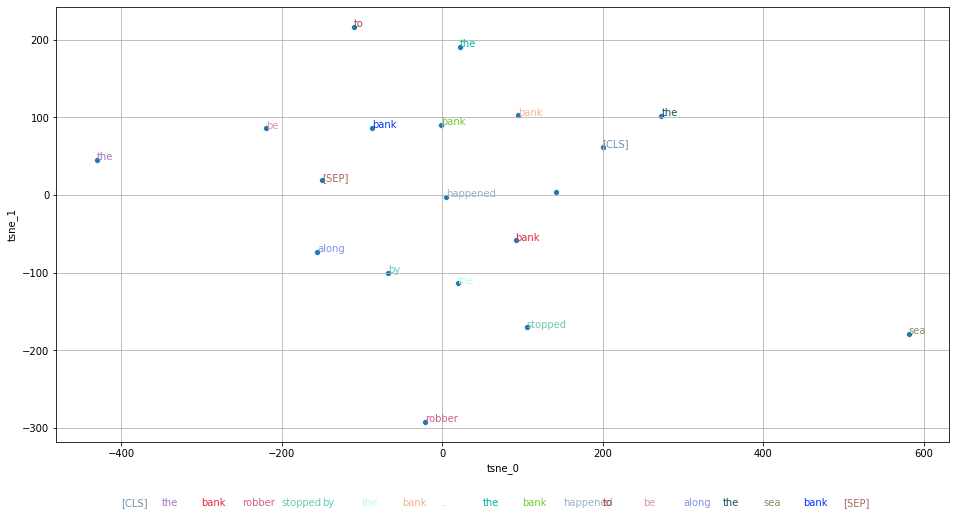

In [44]:
plt.figure(figsize=(16,8))
sns.scatterplot(
    x="tsne_0", y="tsne_1",
    data=df,
    legend="full"
)
plt.grid()

ax = plt.gca()
for (k, v), color in zip(df.iterrows(), token_color):
    ax.annotate(k, v, c=color)

for idx, (token, color) in enumerate(zip(tokens, token_color)):
    plt.text(-400 + idx*50, -400, token, fontsize='medium', color=color)